In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

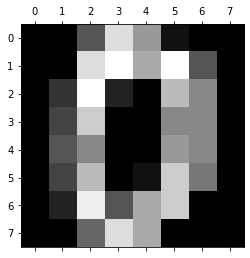

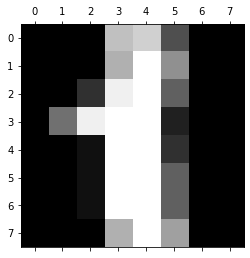

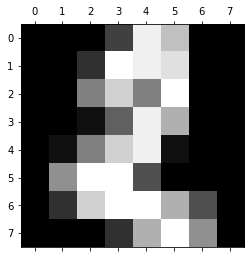

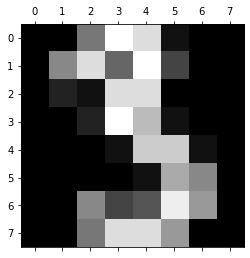

In [5]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [6]:
df = pd.DataFrame(digits.data)

In [8]:
df.shape

(1797, 64)

In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis= 'columns'), df.target, test_size=.25)

In [13]:
len(X_train)

1347

In [14]:
len(X_test)

450

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model = RandomForestClassifier(n_estimators=150)

In [23]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [24]:
model.score(X_test, y_test)

0.9711111111111111

In [25]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[51,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 47,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 42,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  1,  0, 40]])

Text(69.0, 0.5, 'Truth')

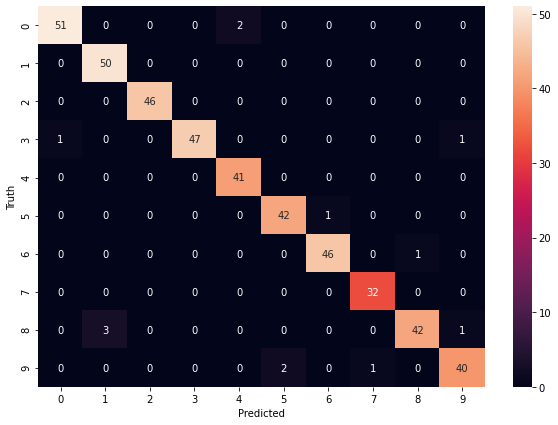

In [29]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')